In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import numpy as np

In [3]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.data import *
from fastai.metrics import *
from fastai.data.external import *
from fastai.data.transforms import *

In [4]:
# install_certifi.py
#
# sample script to install or update a set of default Root Certificates
# for the ssl module.  Uses the certificates provided by the certifi package:
#       https://pypi.python.org/pypi/certifi

import os
import os.path
import ssl
import stat
import subprocess
import sys

STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
             | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
             | stat.S_IROTH |                stat.S_IXOTH )


def main():
    openssl_dir, openssl_cafile = os.path.split(ssl.get_default_verify_paths().openssl_cafile)

    print(" -- pip install --upgrade certifi")
    subprocess.check_call([sys.executable, "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])

    import certifi

    # change working directory to the default SSL directory
    os.chdir(openssl_dir)
    relpath_to_certifi_cafile = os.path.relpath(certifi.where())
    print(" -- removing any existing file or link")
    try:
        os.remove(openssl_cafile)
    except FileNotFoundError:
        pass
    print(" -- creating symlink to certifi certificate bundle")
    os.symlink(relpath_to_certifi_cafile, openssl_cafile)
    print(" -- setting permissions")
    os.chmod(openssl_cafile, STAT_0o775)
    print(" -- update complete")

if __name__ == '__main__':
    main()

 -- pip install --upgrade certifi
 -- removing any existing file or link
 -- creating symlink to certifi certificate bundle
 -- setting permissions
 -- update complete


In [5]:
import os
import os.path
import ssl
import stat
import subprocess
import sys

STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
             | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
             | stat.S_IROTH |                stat.S_IXOTH )

openssl_dir, openssl_cafile = os.path.split(ssl.get_default_verify_paths().openssl_cafile)
subprocess.check_call([sys.executable, "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])
import certifi
os.chdir(openssl_dir)
relpath_to_certifi_cafile = os.path.relpath(certifi.where())
try:
    os.remove(openssl_cafile)
except FileNotFoundError:
    pass
os.symlink(relpath_to_certifi_cafile, openssl_cafile)
os.chmod(openssl_cafile, STAT_0o775)


In [13]:
path = untar_data(URLs.PETS); path

Path('/Users/aidagomezbuenoberezo/.fastai/data/oxford-iiit-pet')

In [14]:
path.ls()

(#2) [Path('/Users/aidagomezbuenoberezo/.fastai/data/oxford-iiit-pet/images'),Path('/Users/aidagomezbuenoberezo/.fastai/data/oxford-iiit-pet/annotations')]

In [15]:
batch_size=64

In [16]:
files = get_image_files(path/"images")

In [17]:
len(files)

7390

In [18]:
files[0].name

'Egyptian_Mau_167.jpg'

In [19]:
np.random.seed(2)
pat=r'^(.*)_\d+.jpg'

In [20]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_size=batch_size, num_workers=0)

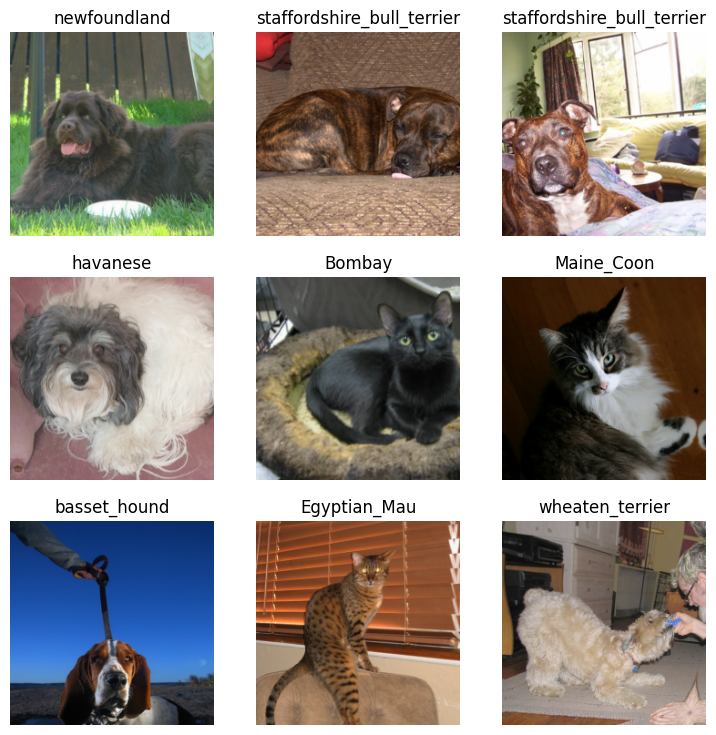

In [29]:
dls.show_batch()

In [30]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224), num_workers=0)

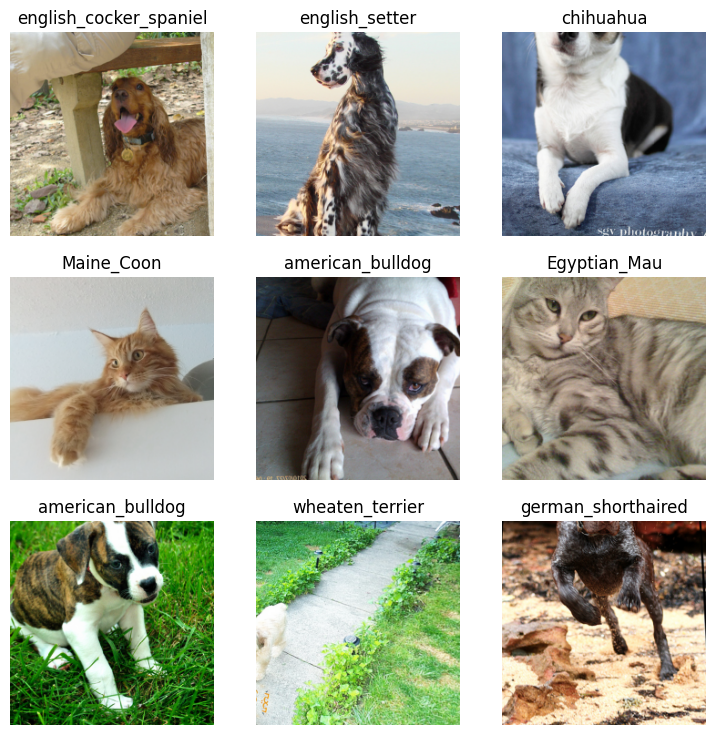

In [31]:
dls.show_batch()

In [33]:
learn = vision_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

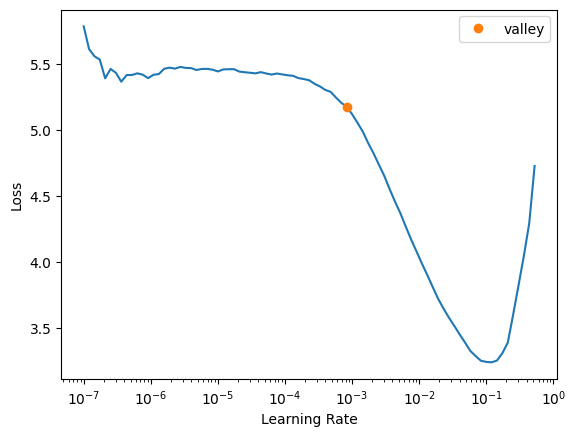

In [34]:
learn.lr_find()

In [35]:
learn.fine_tune(4, 3e-3)

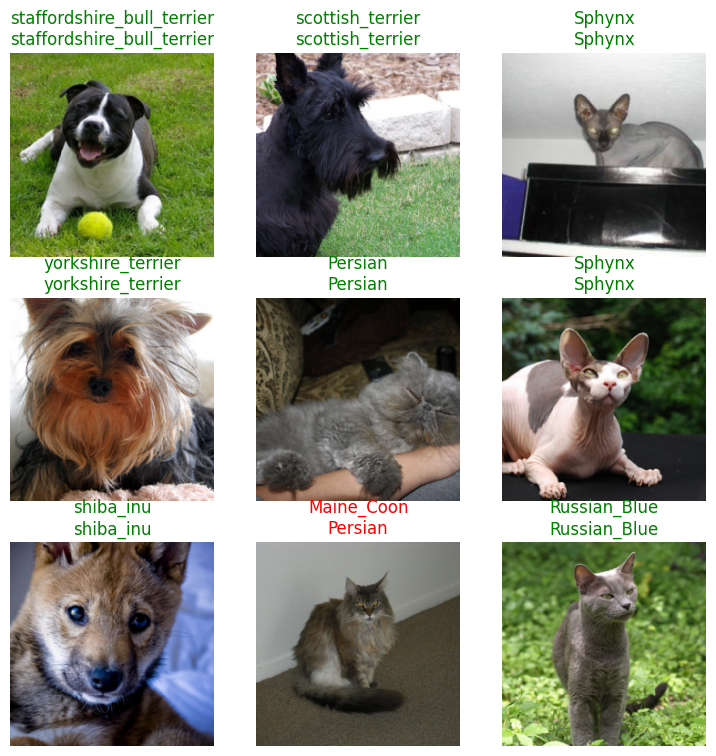

In [36]:
learn.show_results()

In [37]:
interp = Interpretation.from_learner(learn)

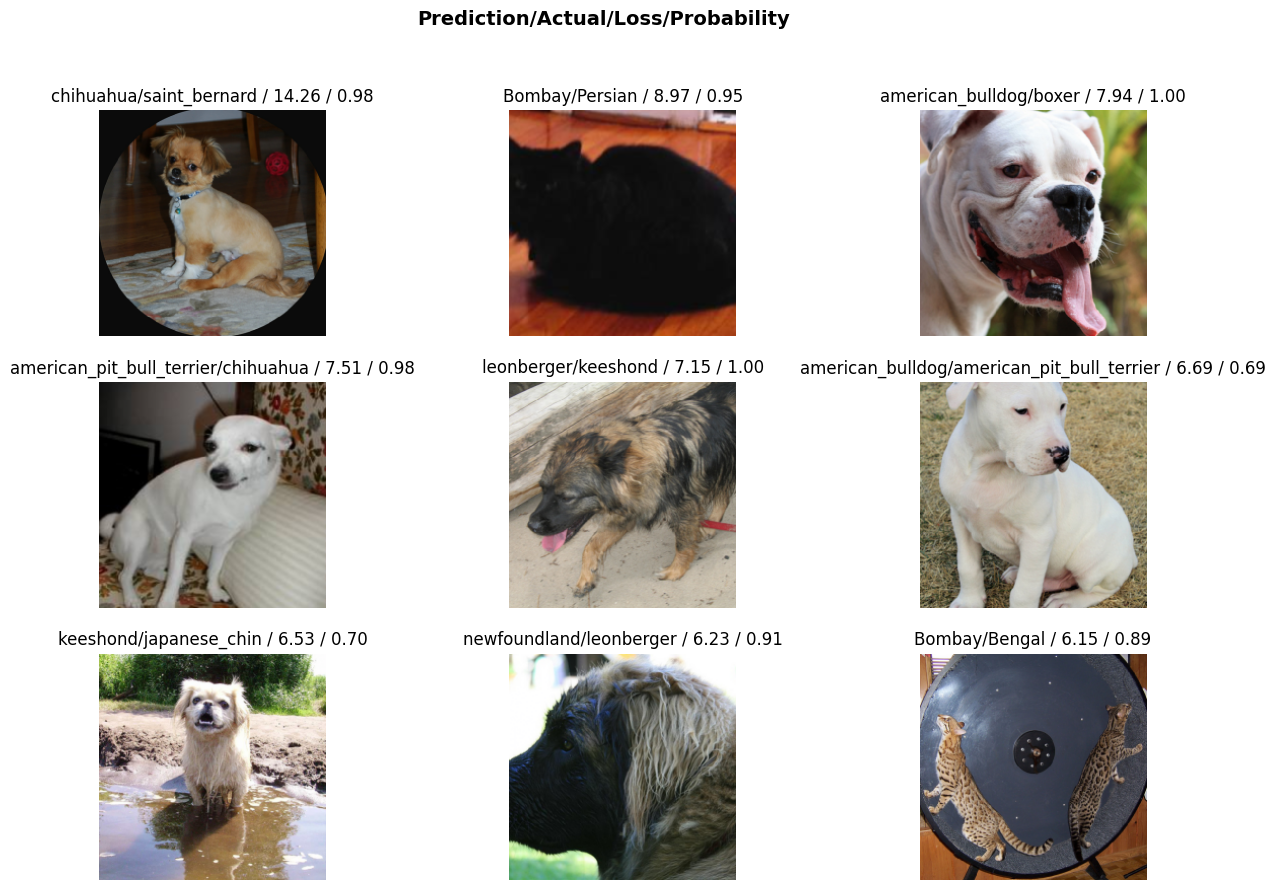

In [38]:
interp.plot_top_losses_lossestop_losses(9, figsize=(15, 10))

In [39]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [40]:
learn.fit_one_cyclecle(4)

In [41]:
learn.save('stage-1')

Path('/Users/aidagomezbuenoberezo/.fastai/data/oxford-iiit-pet/models/stage-1.pth')

In [42]:
interp=ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)

True

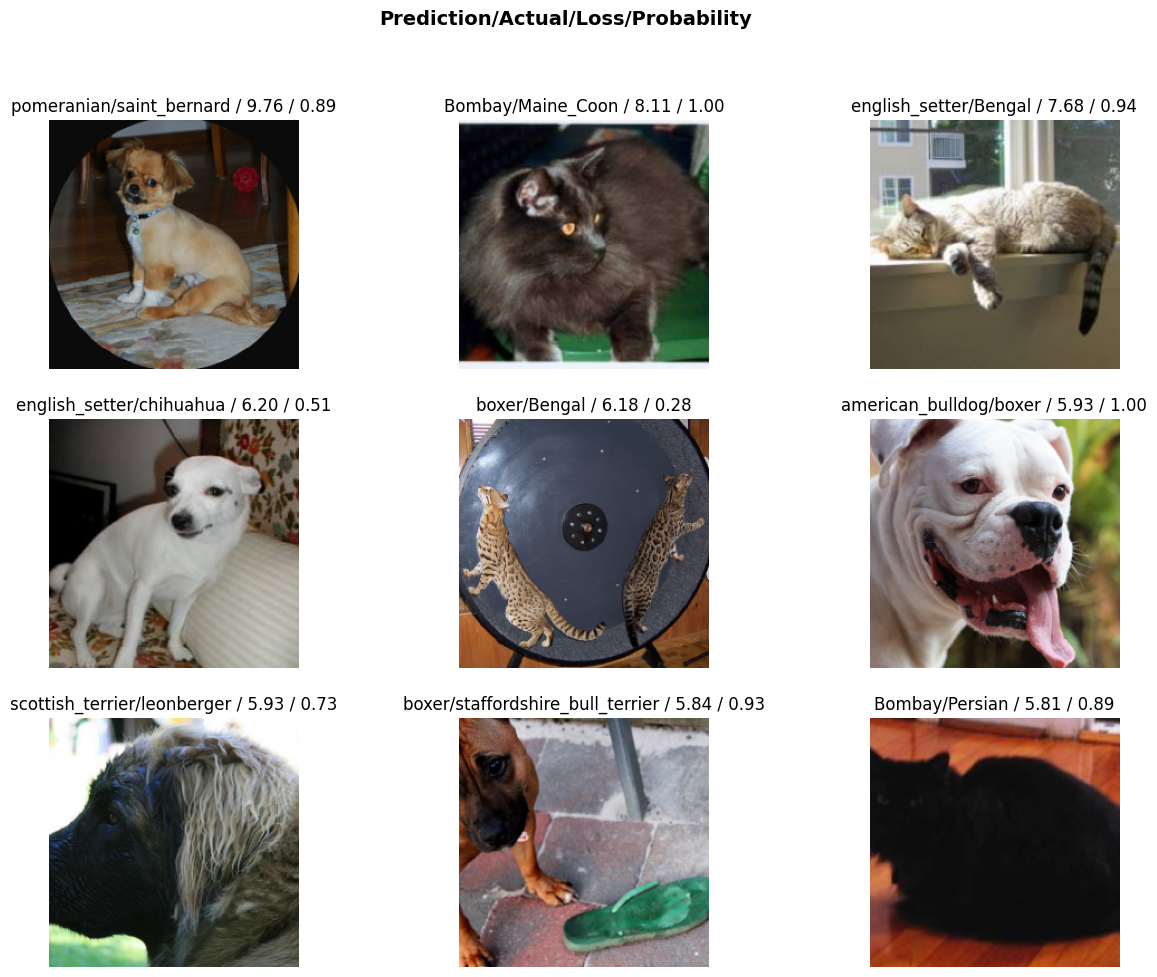

In [43]:
interp.plot_top_losses(9, figsize=(15, 11))

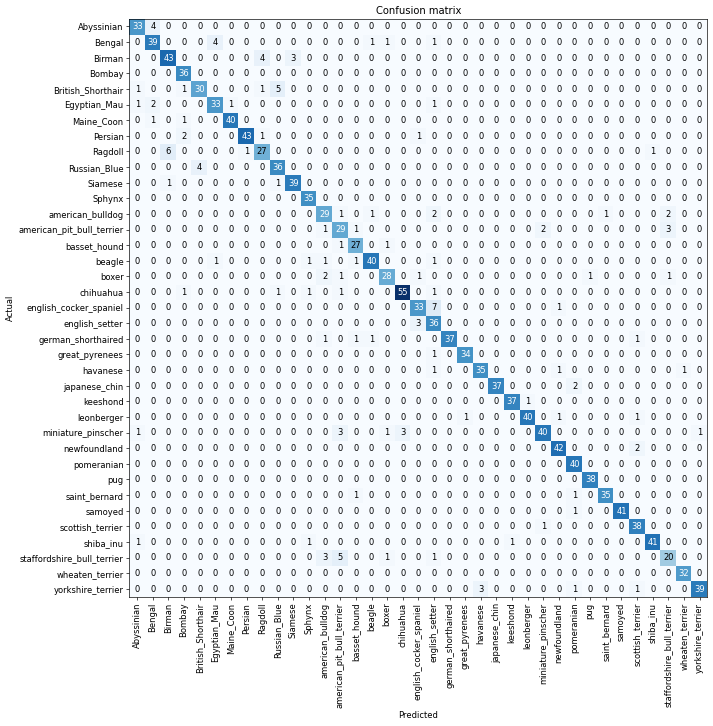

In [44]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [45]:
interp.most_confused(min_val=2)

[('english_cocker_spaniel', 'english_setter', 7),
 ('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Abyssinian', 'Bengal', 4),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Birman', 'Siamese', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Persian', 'Bombay', 2),
 ('american_bulldog', 'english_setter', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('japanese_chin', 'pomeranian', 2),
 ('newfoundland', 'scottish_terrier', 2)]